### Text Mining
- 비정형 데이터인 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 (NLP) 기술을 접목해서 최근에 많이 사용된다.
 - 자연어처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문

### 텍스트 분석
- 단어 빈도분석
    - 혐오데이터셋
- 데이터 수집
    - 스마일게이트에서 실제 댓글을 모아 정제한 데이터셋을 활용

https://github.com/smilegate-ai/korean_unsmile_dataset

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
import os # operating system
# 현재 내 파일의 작업 폴더(저장위치)를 확인 가능
print(os.getcwd())
print()
# 현재 작업 디렉토리 내부 폴더 및 파일 확인
# print(os.listdir('C:\Users\USER\03. MachineLearning')) # 역슬래시 에러 발생
print(os.listdir(r'C:\Users\USER\03. MachineLearning'))
# 역슬래시를 이스케이프코드가 아닌 문자열 순수역슬래시로 인식해주세요~의 의미로 'r' 추가

C:\Users\USER\03. MachineLearning

['.ipynb_checkpoints', 'cache', 'data', 'data_filtered_corr_heatmap.png', 'ex00.선형회귀(이론).ipynb', 'ex01.LinearRegression(집가격예측).ipynb', 'ex02_선형분류실습(직원 이직 여부 예측).ipynb', 'ex03_쁘띠프로젝트_학생중퇴율예측.ipynb', 'ex04_비지도학습(사내식당이용률 예측)).ipynb', 'ex04_비지도학습(조식메뉴가 이상한..).ipynb', 'ex05_텍스트마이닝기초.ipynb']


In [4]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv('data/unsmile_train_v1.0.tsv', delimiter='\t') 
test = pd.read_csv('data/unsmile_valid_v1.0.tsv', delimiter='\t')
# tsv 파일이기 때문에 delimeter를 써야 구분자 에러가 안 뜬다!!

In [5]:
# 데이터 확인
train.head(10)

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


In [6]:
# 결측치 확인
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      3737 non-null   object
 1   여성/가족   3737 non-null   int64 
 2   남성      3737 non-null   int64 
 3   성소수자    3737 non-null   int64 
 4   인종/국적   3737 non-null   int64 
 5   연령      3737 non-null   int64 
 6   지역      3737 non-null   int64 
 7   종교      3737 non-null   int64 
 8   기타 혐오   3737 non-null   int64 
 9   악플/욕설   3737 non-null   int64 
 10  clean   3737 non-null   int64 
 11  개인지칭    3737 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 350.5+ KB


None

##### 전체 데이터에서 단어들의 빈도수를 측정해보자!

In [7]:
text_train = train['문장']
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [8]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용 natural language toolkit
from nltk import word_tokenize # 토큰화를 도와주는 도구
import nltk
nltk.download('punkt') # 문장부호 정보를 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# 첫번째 문장 토큰
# 띄어쓰기가 안된채 토큰화된것이 있음.
word_tokenize(text_train[0])

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까']

In [10]:
# 반복 프로세스의 정도를 시각화 하는 도구
from tqdm import tqdm

In [11]:
words = []
for text in tqdm(text_train):
    temp = word_tokenize(text) # 토큰화
    words = words + temp       # 토큰화된 데이터 변수에 누적

100%|██████████████████████████████████████████████████████████████████████████| 15005/15005 [00:09<00:00, 1513.58it/s]


In [12]:
# 총 몇개의 단어
len(words)

146059

In [13]:
# 단어 빈도 세기
from collections import Counter

In [14]:
# 단어 개수 세서 딕셔너리 형태로 만들어줌.
counter = Counter(words)

In [15]:
# 상위 100개 데이터 확인
words_most_100 = counter.most_common(100)
words_most_100 
# 이 단계에서 데이터전처리가 중요하다. 문장부호가 가장 상위권인데 이것들을 가져가는게 의미있을까?

[('?', 3815),
 ('.', 3416),
 ('!', 2066),
 (',', 1174),
 ('..', 979),
 ('...', 905),
 ('다', 667),
 ('진짜', 543),
 ('왜', 540),
 ('ㅋㅋ', 435),
 ('존나', 376),
 ('그냥', 372),
 ('더', 368),
 ('ㅋㅋㅋ', 363),
 ('>', 296),
 (';', 271),
 ('좀', 265),
 ('이', 254),
 ('시발', 244),
 ('씨발', 244),
 ('그', 240),
 ('ㅋㅋㅋㅋ', 238),
 ('저', 238),
 ('근데', 229),
 ('....', 201),
 ('안', 179),
 ('난', 176),
 ('하는', 174),
 ('새끼들', 174),
 ('이기야', 171),
 ('저런', 169),
 ('수', 169),
 ('무슨', 166),
 ('또', 165),
 (')', 161),
 ('아니라', 154),
 ('하고', 152),
 ('전라도', 152),
 ('뭐', 150),
 ('내가', 149),
 ('(', 147),
 ('ㄹㅇ', 147),
 ('있는', 141),
 ('ㅋ', 141),
 ('너무', 139),
 ('이런', 137),
 ('ㅋㅋㅋㅋㅋ', 135),
 ('잘', 135),
 ('여자', 134),
 ('아', 133),
 ('보면', 124),
 ('걍', 123),
 ('많이', 120),
 ('지금', 119),
 ('역시', 119),
 ('제발', 119),
 ('나도', 117),
 ('거', 116),
 ('어떻게', 115),
 ('같은', 115),
 ('와', 115),
 ('없다', 115),
 ('하면', 112),
 ('저거', 111),
 (':', 109),
 ('이제', 106),
 ('이기', 106),
 ('아니냐', 106),
 ('얼마나', 105),
 ('그럼', 105),
 ('ㅋㅋㅋㅋㅋㅋ', 105),
 ('저렇게', 

In [16]:
# wordcloud 패키지 설치
# !pip install wordcloud

In [17]:
# 도구 불러오기
from wordcloud import WordCloud

In [18]:
# 객체 생성
wc = WordCloud(background_color = 'white', # 배경색 설정
              random_state = 828,
              font_path = r'C:\Windows\Fonts\malgun.ttf') 

In [19]:
# 입력할 때 딕셔너리 형태로 입력할 것!
# 단어 빈도에 따른 워드클라우드 생성
wc_rs = wc.generate_from_frequencies(dict(words_most_100))

In [20]:
import matplotlib.pyplot as plt #matplotlib에서 한글인코딩 필수
plt.rc('font',family="Malgun Gothic")

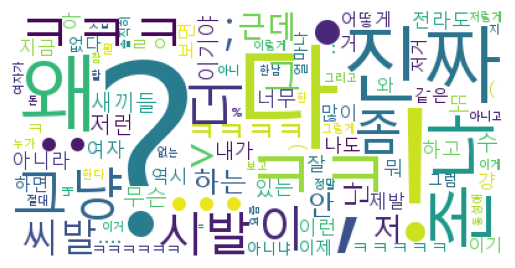

In [21]:
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [22]:
# clean한 label만을 가져와서 워드클라우드 생성하기
# 불리언인덱싱
# train 데이터에서 clean 컬럼의 값이 1인 데이터만 추출 -> 문장만 뽑아오기
clean_text = train[train['clean']==1]['문장']

### 2024.08.29.(목)

In [23]:
# clean한 데이터들을 토큰화하여 리스트에 담기
clean_word = []
for text in tqdm(clean_text):
    temp = word_tokenize(text)
    clean_word = clean_word + temp

100%|████████████████████████████████████████████████████████████████████████████| 3739/3739 [00:00<00:00, 6891.78it/s]


In [24]:
len(clean_word)

27844

In [25]:
counter = Counter(clean_word)
words_most_30 = counter.most_common(30)

In [26]:
# 단어 빈도가 측정된 데이터로 워드클라우드 생성
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

<function matplotlib.pyplot.show(close=None, block=None)>

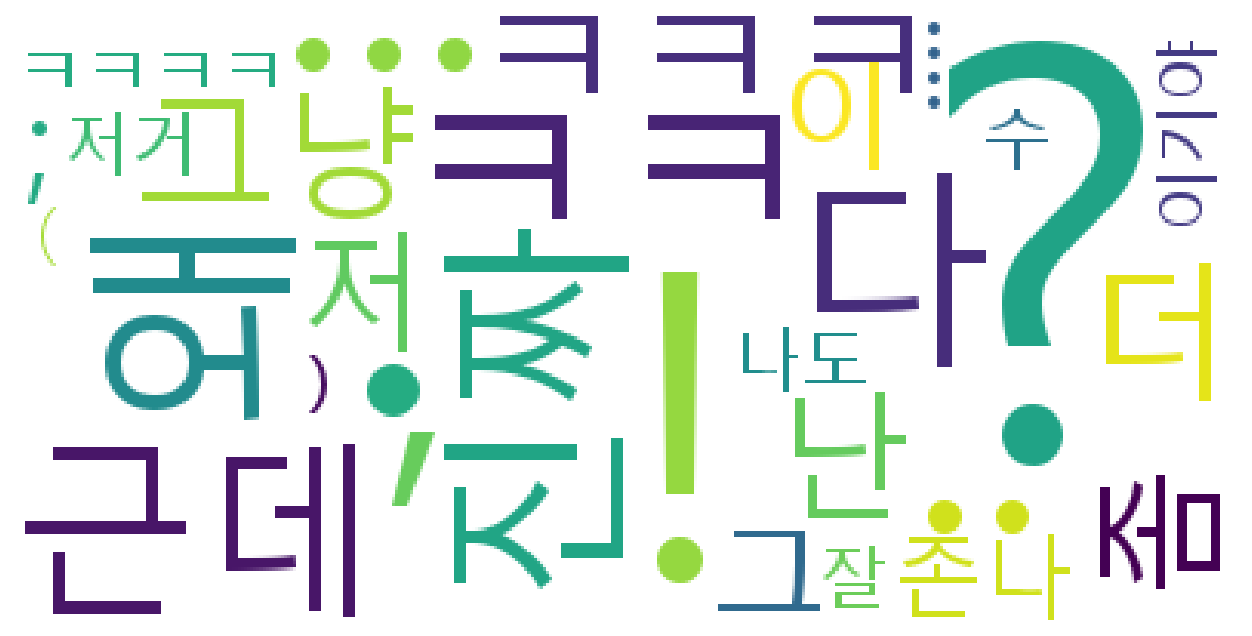

In [27]:
plt.figure(figsize=(20,8)) # 그래프 크기 조정
plt.imshow(wc_rs)
plt.axis('off') # axis 제거
plt.show

### 전처리 : 텍스트데이터 클렌징
- 문장부호 제거
- 특정 글자가 반복적으로 나타나는 단어 토큰 제거 (e.g. ㅋㅋㅋ,ㅋㅋ,ㅋㅋㅋㅋㅋㅋ)
- 1글자 다누이의 토큰 제거 : 보통 1글자 단어는 의미를 갖기가 어렵기 때문!

### 정규표현식 (Regular Expression)
- 특정패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰번호, 이메일 같이 패턴이 있는 문자열의 검색과 치환을 위해 사용된다.

In [28]:
import re # 정규표현식을 사용할 수 있는 모듈

In [29]:
# 원하는 데이터 뽑아내기! 정규표현식 여러개 알아두면 좋을듯~~~
# 핸드폰 번호 검출 예시
# 1. 패턴 지정
p = re.compile("010-?[0-9]{4}-?\\d{4}")
# -? : -(하이픈)이 있을수도 있고 없을수도 잇음
# [0-9]{4} : 0부터 9까지 사이의 숙자 4개가 뒤따른다. ->\\d{4} ->'\\'가 0-9를 의미
p.search("안녕하세요~ 현재 잠시 주차중입니다! 특이사항 발생시 010-1234-5678로 연락주세요~")

<re.Match object; span=(30, 43), match='010-1234-5678'>

In [30]:
# 클렌징할 패턴 생성
unsmile_p = re.compile('[!?.,;0-9a-zA-Zㅋㅎㄷㅇ~]+')
# +: 앞에 있는 문자가 한번이라도 반복되면 검출

In [31]:
# 클렌징 완료된 토큰이 들어갈 리스트 생성
clean_result = []
for w in clean_word:
    if unsmile_p.search(w): # 단어토큰이 패턴에 매칭되면
        continue            # pass
    if len(w) < 2:          # 한글자 단어라면
        continue            # pass
    clean_result.append(w)  # 위의 패턴에 매칭되지 않고 두글자 이상인 데이터들만 리스트에 누적


In [32]:
print(len(clean_word))
print(len(clean_result))

27844
21351


In [33]:
# 최빈단어 개수 확인
counter = Counter(clean_result)
w_m_30 = counter.most_common(30)

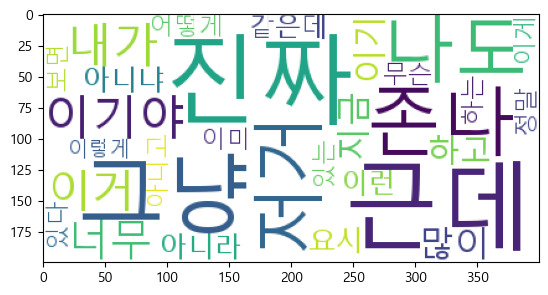

In [34]:
# 단어 빈도가 측정된 데이터로 워드클라우드 생성
wc_rs = wc.generate_from_frequencies(dict(w_m_30))
plt.imshow(wc_rs)

##### 불용어처리 (stop word)
- 데이터셋 내에서 유용한 인사이트를 추출할 수 없는 불필요한 단어 토큰 제거

In [35]:
# 제거하고자 하는 불용어 리스트에 담기
stop_words = ['그냥','진짜','근데','존나']
# 원문에서 제거
stop_clean_words = [] # 불용어가 제거된 리스트
for w in clean_result:
    if w not in stop_words:          # 단어 토큰이 불용어 목록에 있지 않을 경우
        stop_clean_words.append(w)   # 리스트에 누적

In [36]:
# 카운팅된 결과에서 제거
dict_w_m_30 = dict(w_m_30)
for sw in stop_words:
    del dict_w_m_30[sw]

In [37]:
dict_w_m_30

{'나도': 44,
 '저거': 43,
 '이기야': 41,
 '내가': 41,
 '이거': 36,
 '너무': 35,
 '많이': 32,
 '지금': 32,
 '이기': 32,
 '하고': 30,
 '아니냐': 30,
 '이런': 30,
 '요시': 30,
 '아니라': 29,
 '같은데': 28,
 '이미': 26,
 '무슨': 26,
 '어떻게': 26,
 '있는': 25,
 '하는': 25,
 '아니고': 25,
 '보면': 24,
 '정말': 24,
 '있다': 23,
 '이게': 23,
 '이렇게': 23}

# 새로운 라벨 하나 가져와서 전처리 -> 워드클라우드

In [50]:
person_text = train[train['개인지칭']==1]['문장']

In [51]:
person_text

20                                         한국패미=고유정 수준 ㅋㅋㅋ
56       조국 수사는 이제 막바지. 기껏해봐야 와이프가 표장장관련 의혹이 전부. 국민을 위한...
62                                              빍ㅔ이츠 공산당이다
157      근대 7시는 전두환각하가 미워서 그러는거냐? 아니면 진심으로 머중이를 존경하는거냐?...
416      난 14살때부터 정치 관심 있었는데, 애초에 난 책을 제대로 읽기 시작한 때부터 신...
                               ...                        
14797    성현아랑 지나 말고 또 있었음? 그러고보면 지나는 1번에 5천이었다는데 지금샌각해보...
14857                인구좀 줄여 시발 노예가 필요한 기득권층들한테나 인구감소가 재앙이지
14870    ⭕ 난 동성애보다 박근헤가 징역에서 자연법칙에 거스르는 새벽에 손가락으로 손장난하는...
14934        지금까지 특검수준의 조사해놓기 뭘 또 할려구? 나경원 아들래미 특혜 수사나 해보자
14945                             귀귀는 더심한데ㅋㅋㅋ귀귀는 왜 안건드리는거?
Name: 문장, Length: 315, dtype: object

In [52]:
person_word = []
for text in tqdm(person_text):
    temp = word_tokenize(text)
    person_word = person_word + temp

100%|██████████████████████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 9502.21it/s]


In [53]:
len(person_word)

3997

In [54]:
counter = Counter(person_word)
words_most_25 = counter.most_common(25)

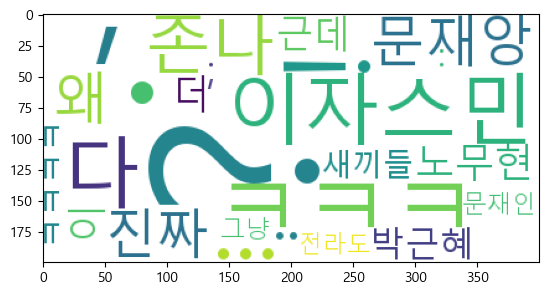

In [55]:
# 단어 빈도가 측정된 데이터로 워드클라우드 생성
ps_rs = wc.generate_from_frequencies(dict(words_most_25))
plt.imshow(ps_rs)

In [56]:
# 클렌징할 패턴 생성
unsmile_p = re.compile('[!?.,;0-9a-zA-Zㅋㅎㄷㅇ~]+')
# +: 앞에 있는 문자가 한번이라도 반복되면 검출

In [57]:
# 클렌징 완료된 토큰이 들어갈 리스트 생성
person_result = []
for w in person_word:
    if unsmile_p.search(w): # 단어토큰이 패턴에 매칭되면
        continue            # pass
    if len(w) < 2:          # 한글자 단어라면
        continue            # pass
    person_result.append(w)  # 위의 패턴에 매칭되지 않고 두글자 이상인 데이터들만 리스트에 누적


In [58]:
# 최빈단어 개수 확인 여기서부터 수정하기!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
counter = Counter(person_result)
w_m_25 = counter.most_common(25)

In [59]:
# 제거하고자 하는 불용어 리스트에 담기
stop_words = ['?','','근데','존나']
# 원문에서 제거
stop_clean_words = [] # 불용어가 제거된 리스트
for w in clean_result:
    if w not in stop_words:          # 단어 토큰이 불용어 목록에 있지 않을 경우
        stop_clean_words.append(w)   # 리스트에 누적

In [60]:
# 카운팅된 결과에서 제거 여기서부터 이상하다###################################################
dict_w_m_25 = dict(w_m_25)
for pr in stop_words:
    del dict_w_m_25[pr]
    

KeyError: '?'

### Kiwi 라이브러리 사용하기
- 형태소 분석 불용어처리, 기타 등등 다양한 자연어처리 기능 지원
- 한국어 분석에 좀 더 용이함!
- <품사태그>
- https://github.com/bab2min/Kiwi?tab=readme-ov-file#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8

In [ ]:
# kiwi 설치하기
# !pip install kiwipiepy

In [ ]:
# 라이브러리 불러오기
from kiwipiepy import Kiwi
kiwi=Kiwi()

In [ ]:
#띄어쓰기 교정하기!
kiwi.space("띄어쓰기없이작성된텍스트를교정해주세요얼마나잘하는지확인해봅시다")

- Kiwi를 이용한 불용어처리

In [ ]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords() # 기본적인 한국어 불용어가 탑재

In [ ]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords = stopwords)

In [ ]:
# 불용어 추가
stopwords.add(("결과",'NNG'))

In [ ]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords = stopwords)

- 이모지 제거

In [ ]:
# 이모지제거 패키지 설치
!pip install emoji

In [ ]:
import emoji

In [ ]:
emoji.replace_emoji("안녕하세요😘 즐거운 목요일입니다 오늘도 파이팅🐱‍🐉🐱‍🐉🐱‍🐉")

In [ ]:
emoji.demojize("안녕하세요😘 즐거운 목요일입니다 오늘도 파이팅🐱‍🐉🐱‍🐉🐱‍🐉")

### 형태소 분석
- 의미를 갖는 말의 가장 작은 단위
- 형태소 단위로 데이터를 분리하고 품사를 부착하는 작업을 품사태깅

In [ ]:
# 형태소로 분리된 단어토큰을 담아줄 리스트
morphs_list = []
for w in tqdm(clean_result):
    morphs_result = kiwi.tokenize(w, stopwords=stopwords)  # 형태소분리, 불용어처리
    morphs_list = morphs_list + morphs_result

In [ ]:
len(morphs_list)

In [ ]:
clean_result[:5]

In [ ]:
morphs_list[:5]

- 특정 품사 필터링하기
- 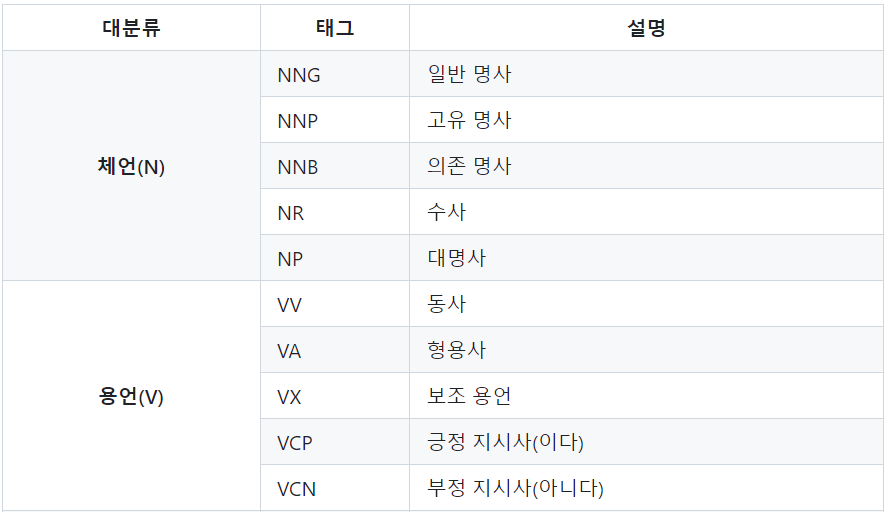

In [ ]:
# 일반명사(NNG), 동사(VV), 형용사(VA) 필터링해서 추출해보자~
morphs_filtering_list = []
for m in morphs_list:
    if m.tag in ['NNG','VV','VA']:
        morphs_filtering_list.append(m.form)

In [ ]:
morphs_list[0].tag

In [ ]:
morphs_list[0].form

In [ ]:
morphs_filtering_list

In [ ]:
counter = Counter(morphs_filtering_list)
words_most_45 = counter.most_common(45)

In [ ]:
# 객체 생성
mp = WordCloud(background_color = 'white', # 배경색 설정
              random_state = 828,
              font_path = r'C:\Windows\Fonts\malgun.ttf') 

In [ ]:
# 단어 빈도가 측정된 데이터로 워드클라우드 생성
mp_rs = wc.generate_from_frequencies(dict(words_most_45))
plt.imshow(mp_rs)

#### 라벨 수정해서 다시 해보기

In [ ]:
extra_list = []
for w in tqdm(person_result):
    extra_result = kiwi.tokenize(w, stopwords=stopwords)  # 형태소분리, 불용어처리
    extra_list = extra_list + extra_result

In [ ]:
extra_list

In [ ]:
# 일반명사(NNG), 동사(VV), 형용사(VA) 필터링해서 추출해보자~
extra_filtering_list = []
for m in extra_list:
    if m.tag in ['NNG','VV','VA']:
        extra_filtering_list.append(m.form)

In [ ]:
extra_filtering_list

In [ ]:
counter = Counter(extra_filtering_list)
extra_most_45 = counter.most_common(45)

In [ ]:
# 객체 생성
et = WordCloud(background_color = 'white', # 배경색 설정
              random_state = 828,
              font_path = r'C:\Windows\Fonts\malgun.ttf') 

In [ ]:
# 단어 빈도가 측정된 데이터로 워드클라우드 생성
et_rs = wc.generate_from_frequencies(dict(extra_most_45))
plt.imshow(et_rs)